# Interact from ipywidgets

Loading libraries

In [1]:
from ipywidgets import interact, fixed
import ipywidgets as widgets
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Inline matplotlib and costume image size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


Loading image

In [2]:
image = cv2.imread("images/edges.jpg")

In [3]:
def showEdges(img, thresholds, blur, blurType):
    """ Function called by interact """
    if blur:
        if blurType == 'Median':
            img = cv2.medianBlur(img, 5)
        elif blurType == 'Guassian':
            img = cv2.GaussianBlur(img, (5, 5), 0)
        elif blurType == 'Bilateral': 
            img = cv2.bilateralFilter(img, 9, 75, 75)
            
    thresh1, thresh2 = thresholds
    edges = cv2.Canny(img, thresh1, thresh2)
    plt.imshow(edges, cmap = 'gray')

In [4]:
# Creating costume widget
rangeSlider = widgets.IntRangeSlider(
    value = [50, 200],
    min = 0,
    max = 255,
    step = 1,
    description = 'Thresholds',
    continuous_update = False
)

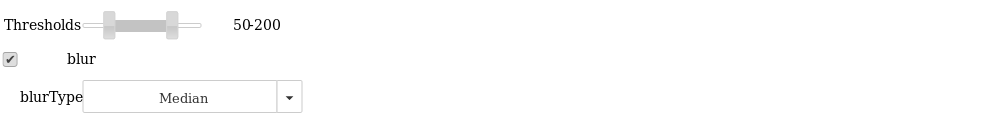

<function __main__.showEdges>

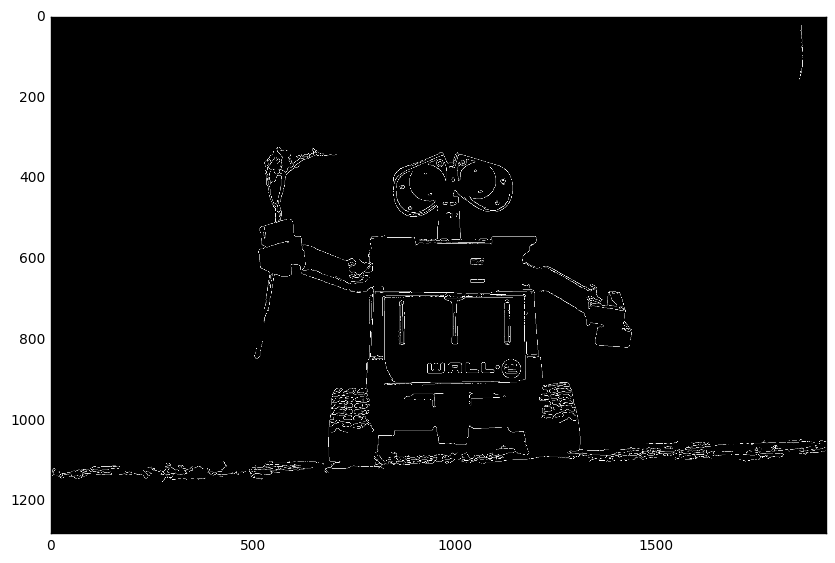

In [5]:
# Using interact from ipywidgets
# You have to specify the value of every parameter
# or define the specific widget (rangeSlider)
# Other parameters must be fixed
interact(showEdges,
         img = fixed(image),
         thresholds = rangeSlider,
         blur = True,
         blurType = ['Median', 'Guassian', 'Bilateral'])